## Analysing airbnb rents in new york
the data is available at: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

the data is from 2019

## Problem description

Trying to find patterns in the rents, if there are more expensive neighborhoods, checking what part of the city is more busy(less availability)

CONCLUSIONS ARE AVAILABLE AT THE END OF THE PAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the data
df = pd.read_csv('airbnb.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#checking if there are nan values
df.isna().sum()/len(df)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [24]:
#replacing the nan values for 0
df.fillna(0, inplace=True)

Text(0.5, 1.0, 'number of places per neighborhood')

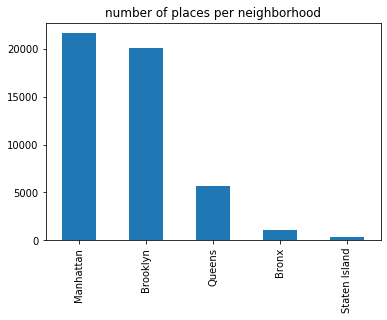

In [20]:
#checking which neighborhood has more places to rent
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title("number of places per neighborhood")

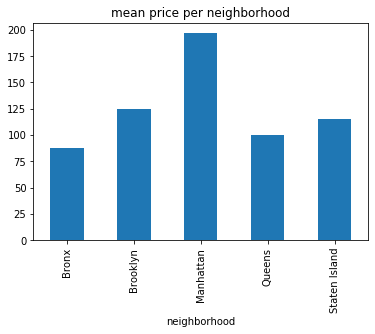

In [16]:
#checking the mean rent price per neighborhood
df.groupby(['neighbourhood_group'])['price'].mean().plot(kind="bar")
plt.title('mean price per neighborhood')
plt.xlabel('neighborhood')
plt.show()

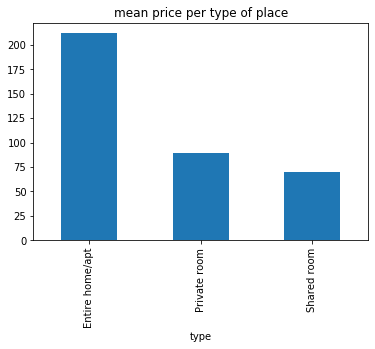

In [39]:
#checking the mean price per type of place
df.groupby(['room_type'])['price'].mean().plot(kind="bar")
plt.title('mean price per type of place')
plt.xlabel('type')
plt.show()

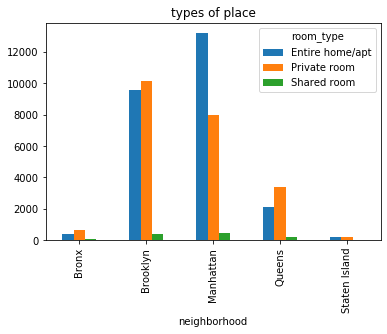

In [18]:
pd.crosstab(df.neighbourhood_group,df.room_type).plot(kind="bar")
plt.title('types of place')
plt.xlabel('neighborhood')
plt.show()

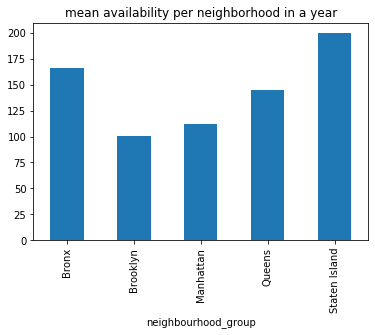

In [49]:
df.groupby(['neighbourhood_group'])['availability_365'].mean().plot(kind='bar')
plt.title('mean availability per neighborhood in a year')
plt.show()



Text(0.5, 1.0, 'minimum nights per neighborhood')

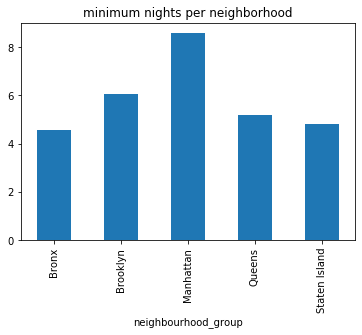

In [46]:
df.groupby(['neighbourhood_group'])['minimum_nights'].mean().plot(kind='bar')
plt.title('minimum nights per neighborhood')


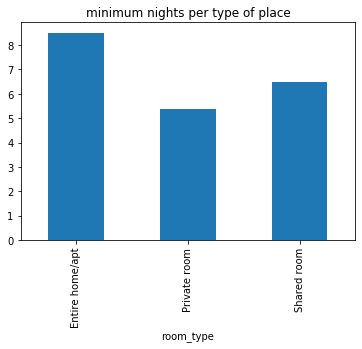

In [50]:
df.groupby(['room_type'])['minimum_nights'].mean().plot(kind='bar')
plt.title('minimum nights per type of place')
plt.show()

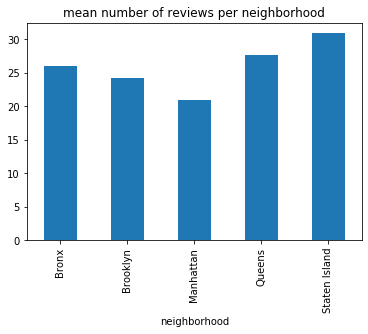

In [54]:
#comparing the reviews per neighborhood
df.groupby(['neighbourhood_group'])['number_of_reviews'].mean().plot(kind='bar')
plt.title('mean number of reviews per neighborhood')
plt.xlabel('neighborhood')
plt.show()

# CONCLUSIONS

After exploring the data, we can observe some patterns.

1 - Manhattan and Brooklyn have almost 85% of the places available for rent in New York.

2 - Manhattan price average is much higher than other neighborhoods, due to his priviled location being the tourism and work centre in the city

3 - Brooklyn appears to be the best cost benefit situation, due to his good location and has a good price when compared to Manhattan

4 - A entire place rest costs more than double comparing to the other option. Renting a single room when traveling alone might be a great idea to save money.

5- Manhattan is the only neighborhood that has more entire places for rent than shared, most likely due the intense labor market in the area and the greater purchasing power (Brooklyn has a younger profile)

6 - Brooklyn is the busiest area in New York, the average days per year a place in Brooklyn is available for rent is 100.

8 - If you looking for a stay in Manhattan, the average of minimum nights you need to stay is 8, much higher than other neighborhoods and a problem for people who are looking for a short stay.

9 - Staten Island has the higher average of reviews, due to the lower number of places to rent in the area comparing to others.